# Lab 2 - Julia Code

Group 3: Dube, V., Garay, E. Guerrero, J., Villalba, M.

## Multicollinearity

Multicolinearity occurs when two or more predictors in a regresion model are highly correlated to one another, causing a higher variance our the estimated coefficients. To understand the way multicollinearity affects our regresion we can examine the composition of the variance of our estimates. 

Suppose some Data Generating Process follows:

\begin{equation*}
  Y = X_1\beta_1 +\epsilon
\end{equation*}

Considering the partitioned regression model:

\begin{align*}
  Y &= X\beta + e \\
  Y &= X_1\beta_1 + X_2\beta_2 + e
\end{align*}

We know that the OLS estimator will solve this equation:

\begin{align*}
(X'X)\hat{\beta} &=X'Y \\

\begin{bmatrix}
  X_1'X_1      & X_1'X_2   \\
  X_2'X_1      & X_2'X_2 
\end{bmatrix}
\begin{bmatrix}
\hat{\beta_1} \\
\hat{\beta_2}
\end{bmatrix}
& =
\begin{bmatrix}
X_1'Y \\
X_2'Y
\end{bmatrix}
\end{align*}

This, because of the Frisch-Whaugh-Lovell Theorem, yields:

\begin{align*}
  \hat{\beta_1} &= (X_1'M_2X_1)^{-1}X_1'M_2Y
\end{align*}

Where $M_2 = I - X_2(X_2'X_2)^{-1}X_2'$, is the orthogonal projection matrix to $X_2$.

Note that $M_2$ is symmetric, idempotent, and that any variable premultiplied by it yields the residual from from running $X_2$ on that variable. For an arbitrary variable $Z$:

\begin{align*}
  M_2Z &= (I - X_2(X_2'X_2)^{-1}X_2')Z \\
  &= Z - X_2(X_2'X_2)^{-1}X_2'Z \\
  &= Z - X_2\hat{\omega} \\
  &= Z - \hat{Z} \\
  &= e_{Z}
\end{align*}

Where $e_{Z}$ and $\hat{\omega} \equiv (X_2'X_2)^{-1}X_2'Z$ come from the regresion: $$ Z = X_2\hat{\omega} + e_{Z}$$

In a sense, the $M_2$ matrix cleanses or "filters out" our $Z$ variable, keeping only the part which is orthogonal to $X_2$.

Returning to $\hat{\beta_1}$:

\begin{align*}
  \hat{\beta_1} &= (X_1'M_2X_1)^{-1}X_1'M_2Y \\
  &= (X_1'M_2X_1)^{-1}X_1'M_2(X_1\beta_1 + \epsilon) \\
  &= \beta_1 + (X_1'M_2X_1)^{-1}X_1'M_2\epsilon 
\end{align*}

For the conditional variance of $\hat{\beta_1}$ this has great implications:

\begin{align*}
  Var(\hat{\beta_1}|X) &= Var(\beta_1 + (X_1'M_2X_1)^{-1}X_1'M_2\epsilon|X) \\
  &= Var((X_1'M_2X_1)^{-1}X_1'M_2\epsilon|X) \\
  &= E[((X_1'M_2X_1)^{-1}X_1'M_2\epsilon)((X_1'M_2X_1)^{-1}X_1'M_2\epsilon)'|X] \\
  &= E[(X_1'M_2X_1)^{-1}X_1'M_2\epsilon\epsilon'M_2'X_1(X_1'M_2'X_1)^{-1}|X] \\
  &= (X_1'M_2X_1)^{-1}X_1'M_2E[\epsilon\epsilon'|X]M_2'X_1(X_1'M_2'X_1)^{-1}
\end{align*}

Under the traditional assumption that $E[\epsilon\epsilon'|X] = \sigma^2I$:

\begin{align*}
 Var(\hat{\beta_1}|X) &= \sigma^2(X_1'M_2X_1)^{-1}X_1'M_2M_2'X_1(X_1'M_2'X_1)^{-1} \\
&= \sigma^2(X_1'M_2'X_1)^{-1}
\end{align*}

Remembering that the variance of $X_1$ can be decomposed into two positive components:

\begin{align*}
  X_1 &= X_2\alpha + v \\
  Var(X_1) &= Var(X_2\alpha) + Var(v) \\
  Var(X_1) - Var(X_2\alpha) &= Var(v) \\
  E[X_1'X_1] - Var(X_2\alpha) &= E[X_1'M_2'X_1]
\end{align*}

Thus, necessarily: $$E[X_1'M_2X_1] \leq E[X_1'X_1]$$ 

Altogether this means: $$\sigma^2(X_1'X_1)^{-1} \leq \sigma^2(X_1'M_2'X_1)^{-1}$$

This shows that controlling for the irrelevant variables $X_2$ will in fact increase the variance of $\hat{\beta_1}$ by limiting us to the "usable" variance of $X_1$ which is orthogonal to $X_2$. 

Suppose we want to estimate the impact of years of schooling on future salary. Imagine as well that we have a vast array of possible control variables at our disposal. Someone who is not familiar with the concept of multicollinearity might think that to avoid any possibility of ommited variable bias and ensure consistency it is best to control for everything we can. We now know this is not the case and that this approach can inadvertently introduce multicollinearity. 

Consider that we have as a possible control variable the total number of courses taken by each student. Intuitively, years of schooling are likely to correlate strongly with the number of total courses taken (more years in school tipically leads to more courses completed) and so controlling for this variable may result in the problem described above, inflating the variance of the estimated coefficients and potentially distorting our understanding of the true effect of schooling on salary. 

The same rationale applies to many other examples. For instance, imagine estimating the impact of marketing expenditure on sales. Controlling for variable such as number of marketing campaigns will probably cause the same issue.

### Perfectly collinear regressors

A special case of the previously mentioned concept of multicollinearity arises when a variable is a linear combination of some other variables from our dataset, so not only are these variables highly correlated, but we say that they are perfectly collinear.

Considering the partitioned regression model:

\begin{align*}
    Y &= x_1\beta_1 + X_2\beta_2 + \epsilon \\
    x_1 &= X_2 \alpha
\end{align*}

where the second equation is deterministic.

We know that the OLS estimator will solve this equation:

\begin{align*}
(X'X)\hat{\beta} &=X'Y \\

\begin{bmatrix}
  X_1'X_1      & X_1'X_2   \\
  X_2'X_1      & X_2'X_2 
\end{bmatrix}
\begin{bmatrix}
\hat{\beta_1} \\
\hat{\beta_2}
\end{bmatrix}
& =
\begin{bmatrix}
X_1'Y \\
X_2'Y
\end{bmatrix}
\end{align*}

Substituting $X_1 = X_2 \alpha$ on the $(X'X)$ matrix:

\begin{align*}
(X'X) &=
\begin{bmatrix}
  (X_2\alpha)'X_2\alpha      & (X_2\alpha)'X_2   \\
  X_2'(X_2\alpha)      & X_2'X_2 
\end{bmatrix} \\

&=
\begin{bmatrix}
  \alpha'X_2'X_2\alpha      & \alpha'X_2'X_2   \\
  X_2'X_2\alpha      & X_2'X_2 
\end{bmatrix}
\end{align*}

This yields the determinant:

\begin{align*}
\det (X'X) &= \det\left(
\begin{bmatrix}
  \alpha'X_2'X_2\alpha      & \alpha'X_2'X_2   \\
  X_2'X_2\alpha      & X_2'X_2 
\end{bmatrix} \right) \\
\end{align*}

Transforming the matrix using row operations:
\begin{align*}
\det (X'X) &= \det\left(
\begin{bmatrix}
  I      & -\alpha'   \\
  0      & I 
\end{bmatrix}
\begin{bmatrix}
  \alpha'X_2'X_2\alpha      & \alpha'X_2'X_2   \\
  X_2'X_2\alpha      & X_2'X_2 
\end{bmatrix} \right) \\
&= \det\left(
\begin{bmatrix}
  0      & 0   \\
  X_2'X_2\alpha      & X_2'X_2 
\end{bmatrix} \right)
\end{align*}

Like this, we can see that:
\begin{align*}
\det (X'X) &= 0
\end{align*}

Because of this, $(X'X)$ is not invertible and there is no solution for the OLS estimation


### Practical application

We can easily show what we have theoretically explained with a practical application. We will create a dataset simulating the regressors that we may want to include in the estimation of a linear model.

The first 9 variables follow a normal distribution.

In [11]:
using LinearAlgebra
using Random

Random.seed!(0)
matrix = randn(10, 9)

10×9 Matrix{Float64}:
 -0.231909   -0.269885  -1.07458   …  -0.57796     0.27262    0.849341
  0.94039     0.578004  -1.38197      -1.78676     1.23521   -0.210716
  0.596762    1.16034    0.951853     -1.36705     1.11072   -0.143171
  1.99782     0.287888  -0.292291      0.660498    1.85158   -0.121578
 -0.0515618  -0.441193   0.328946      0.0371086  -0.131821   0.47354
  1.17224     0.134576  -0.495999  …   0.877644   -0.406776  -0.0923911
 -1.69681     0.165543   0.22277       1.79296    -0.379297  -0.550621
 -2.11615    -1.0721    -1.66125      -1.35785    -0.499403  -0.474732
  0.558366   -1.26016    1.92524      -1.48326    -0.635276   0.237598
 -0.86473     0.196408  -1.04847       0.475453    2.28402    0.100588

However, the 10th variable is a linear combination (the sum) of variables 1, 5 and 9.

In [12]:
coefficients = [1, 1, 1]
selected_columns = [1, 5, 9]
matrix = hcat(matrix, matrix[:, selected_columns] * coefficients)

10×10 Matrix{Float64}:
 -0.231909   -0.269885  -1.07458   …   0.27262    0.849341    0.100641
  0.94039     0.578004  -1.38197       1.23521   -0.210716   -0.828557
  0.596762    1.16034    0.951853      1.11072   -0.143171   -0.510355
  1.99782     0.287888  -0.292291      1.85158   -0.121578    3.1357
 -0.0515618  -0.441193   0.328946     -0.131821   0.47354    -0.951298
  1.17224     0.134576  -0.495999  …  -0.406776  -0.0923911   0.815082
 -1.69681     0.165543   0.22277      -0.379297  -0.550621   -1.00174
 -2.11615    -1.0721    -1.66125      -0.499403  -0.474732   -2.84605
  0.558366   -1.26016    1.92524      -0.635276   0.237598    2.11939
 -0.86473     0.196408  -1.04847       2.28402    0.100588   -0.864591

As we saw in theory, this should cause our dataset to have a determinant of zero. Thus, making X singular and yielding an error message when trying to invert it.

In [14]:
det(matrix)

-2.548968811760904e-14

In [13]:
inv_matrix = inv(matrix)

10×10 Matrix{Float64}:
  4.21177e15   3.21803e15   2.84373e15  …   5.35458e15   2.48399e15
  0.35937      0.106139     0.159937       -0.497513    -0.629165
 -1.9799      -1.79593     -0.971094       -2.79778     -1.85628
  0.382724    -0.282216     0.588743        0.183997     0.0466157
  4.21177e15   3.21803e15   2.84373e15      5.35458e15   2.48399e15
 -3.02412     -2.49823     -2.12259     …  -4.6385      -2.89822
 -1.40691     -1.3032      -0.896793       -2.0195      -0.996493
 -1.28789     -0.920547    -0.753483       -1.62345     -0.682825
  4.21177e15   3.21803e15   2.84373e15      5.35458e15   2.48399e15
 -4.21177e15  -3.21803e15  -2.84373e15     -5.35458e15  -2.48399e15

We can see that this is not the case. Is this a contradiction to our theoretical proof? Julia, as well as Python, yield a determinant extremely close to cero but not equal to cero, so they are able to find a "supposed" inverse to the matrix. This would seem to contradict what we have proven in theory, however, this is a problem rooted in the way those languages handle float values. Thus, that is not a contradiction of theory but rather an illustration of how computational environments deal differently with the inherent limitations of floating-point arithmetic.

## Analyzing RCT data with Precision Adjustment

In [5]:
using DataFrames
using FilePaths
using Queryverse
using GLM
using StatsModels
using Combinatorics
using Iterators
using CategoricalArrays
using HypothesisTests
using StatsBase
using Lasso
using TypedTables
using MacroTools
using NamedArrays
using DataTables
using Latexify
using PrettyTables
using TypedTables
using TexTables
using DataTables
using FilePaths
using Combinatorics
using CategoricalArrays
using TypedTables
using MacroTools
using HDMjl


Precompiling Queryverse
  ✗ BinaryProvider
  ✗ Snappy
  ✗ Parquet
  ✗ ParquetFiles
        Info Given Queryverse was explicitly requested, output will be shown live 
ERROR: LoadError: Snappy not installed properly, run Pkg.build("Snappy"), restart Julia and try again
Stacktrace:
 [1] error(s::String)
   @ Base .\error.jl:35
 [2] top-level scope
   @ C:\Users\Erzo\.julia\packages\Snappy\O2CHr\src\Snappy.jl:8
 [3] include
   @ .\Base.jl:495 [inlined]
 [4] include_package_for_output(pkg::Base.PkgId, input::String, depot_path::Vector{String}, dl_load_path::Vector{String}, load_path::Vector{String}, concrete_deps::Vector{Pair{Base.PkgId, UInt128}}, source::String)
   @ Base .\loading.jl:2222
 [5] top-level scope
   @ stdin:3
in expression starting at C:\Users\Erzo\.julia\packages\Snappy\O2CHr\src\Snappy.jl:3
in expression starting at stdin:3
ERROR: LoadError: Failed to precompile Snappy [59d4ed8c-697a-5b28-a4c7-fe95c22820f9] to "C:\\Users\\Erzo\\.julia\\compiled\\v1.10\\Snappy\\jl_59CB.tmp"

    @ .\essentials.jl:894 [inlined]
  [9] invokelatest
    @ .\essentials.jl:889 [inlined]
 [10] maybe_cachefile_lock(f::Base.var"#968#969"{Base.PkgId}, pkg::Base.PkgId, srcpath::String; stale_age::Int64)
    @ Base .\loading.jl:2983
 [11] maybe_cachefile_lock
    @ .\loading.jl:2980 [inlined]
 [12] _require(pkg::Base.PkgId, env::String)
    @ Base .\loading.jl:1970
 [13] __require_prelocked(uuidkey::Base.PkgId, env::String)
    @ Base .\loading.jl:1812
 [14] #invoke_in_world#3
    @ .\essentials.jl:926 [inlined]
 [15] invoke_in_world
    @ .\essentials.jl:923 [inlined]
 [16] _require_prelocked(uuidkey::Base.PkgId, env::String)
    @ Base .\loading.jl:1803
 [17] macro expansion
    @ .\loading.jl:1790 [inlined]
 [18] macro expansion
    @ .\lock.jl:267 [inlined]
 [19] __require(into::Module, mod::Symbol)
    @ Base .\loading.jl:1753
 [20] #invoke_in_world#3
    @ .\essentials.jl:926 [inlined]
 [21] invoke_in_world
    @ .\essentials.jl:923 [inlined]
 [22] require(into::Module, mod::Sym

  ✗ Queryverse
  0 dependencies successfully precompiled in 27 seconds. 133 already precompiled.



LoadError: The following 1 direct dependency failed to precompile:

Queryverse [612083be-0b0f-5412-89c1-4e7c75506a58]

Failed to precompile Queryverse [612083be-0b0f-5412-89c1-4e7c75506a58] to "C:\\Users\\Erzo\\.julia\\compiled\\v1.10\\Queryverse\\jl_32A9.tmp".
[91m[1mERROR: [22m[39mLoadError: Snappy not installed properly, run Pkg.build("Snappy"), restart Julia and try again
Stacktrace:
 [1] [0m[1merror[22m[0m[1m([22m[90ms[39m::[0mString[0m[1m)[22m
[90m   @[39m [90mBase[39m [90m.\[39m[90m[4merror.jl:35[24m[39m
 [2] top-level scope
[90m   @[39m [90mC:\Users\Erzo\.julia\packages\Snappy\O2CHr\src\[39m[90m[4mSnappy.jl:8[24m[39m
 [3] [0m[1minclude[22m
[90m   @[39m [90m.\[39m[90m[4mBase.jl:495[24m[39m[90m [inlined][39m
 [4] [0m[1minclude_package_for_output[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90minput[39m::[0mString, [90mdepot_path[39m::[0mVector[90m{String}[39m, [90mdl_load_path[39m::[0mVector[90m{String}[39m, [90mload_path[39m::[0mVector[90m{String}[39m, [90mconcrete_deps[39m::[0mVector[90m{Pair{Base.PkgId, UInt128}}[39m, [90msource[39m::[0mString[0m[1m)[22m
[90m   @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2222[24m[39m
 [5] top-level scope
[90m   @[39m [90m[4mstdin:3[24m[39m
in expression starting at C:\Users\Erzo\.julia\packages\Snappy\O2CHr\src\Snappy.jl:3
in expression starting at stdin:3
[91m[1mERROR: [22m[39mLoadError: Failed to precompile Snappy [59d4ed8c-697a-5b28-a4c7-fe95c22820f9] to "C:\\Users\\Erzo\\.julia\\compiled\\v1.10\\Snappy\\jl_59CB.tmp".
Stacktrace:
  [1] [0m[1merror[22m[0m[1m([22m[90ms[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4merror.jl:35[24m[39m
  [2] [0m[1mcompilecache[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90mpath[39m::[0mString, [90minternal_stderr[39m::[0mIO, [90minternal_stdout[39m::[0mIO, [90mkeep_loaded_modules[39m::[0mBool[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2468[24m[39m
  [3] [0m[1mcompilecache[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:2340[24m[39m[90m [inlined][39m
  [4] [0m[1m(::Base.var"#968#969"{Base.PkgId})[22m[0m[1m([22m[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1974[24m[39m
  [5] [0m[1mmkpidlock[22m[0m[1m([22m[90mf[39m::[0mBase.var"#968#969"[90m{Base.PkgId}[39m, [90mat[39m::[0mString, [90mpid[39m::[0mInt32; [90mkwopts[39m::[0m@Kwargs[90m{stale_age::Int64, wait::Bool}[39m[0m[1m)[22m
[90m    @[39m [35mFileWatching.Pidfile[39m [90mC:\Users\Erzo\AppData\Local\Programs\Julia-1.10.2\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:93[24m[39m
  [6] [0m[1m#mkpidlock#6[22m
[90m    @[39m [90mC:\Users\Erzo\AppData\Local\Programs\Julia-1.10.2\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:88[24m[39m[90m [inlined][39m
  [7] [0m[1mtrymkpidlock[22m[0m[1m([22m::[0mFunction, ::[0mVararg[90m{Any}[39m; [90mkwargs[39m::[0m@Kwargs[90m{stale_age::Int64}[39m[0m[1m)[22m
[90m    @[39m [35mFileWatching.Pidfile[39m [90mC:\Users\Erzo\AppData\Local\Programs\Julia-1.10.2\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:111[24m[39m
  [8] [0m[1m#invokelatest#2[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:894[24m[39m[90m [inlined][39m
  [9] [0m[1minvokelatest[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:889[24m[39m[90m [inlined][39m
 [10] [0m[1mmaybe_cachefile_lock[22m[0m[1m([22m[90mf[39m::[0mBase.var"#968#969"[90m{Base.PkgId}[39m, [90mpkg[39m::[0mBase.PkgId, [90msrcpath[39m::[0mString; [90mstale_age[39m::[0mInt64[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2983[24m[39m
 [11] [0m[1mmaybe_cachefile_lock[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:2980[24m[39m[90m [inlined][39m
 [12] [0m[1m_require[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1970[24m[39m
 [13] [0m[1m__require_prelocked[22m[0m[1m([22m[90muuidkey[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1812[24m[39m
 [14] [0m[1m#invoke_in_world#3[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:926[24m[39m[90m [inlined][39m
 [15] [0m[1minvoke_in_world[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:923[24m[39m[90m [inlined][39m
 [16] [0m[1m_require_prelocked[22m[0m[1m([22m[90muuidkey[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1803[24m[39m
 [17] [0m[1mmacro expansion[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:1790[24m[39m[90m [inlined][39m
 [18] [0m[1mmacro expansion[22m
[90m    @[39m [90m.\[39m[90m[4mlock.jl:267[24m[39m[90m [inlined][39m
 [19] [0m[1m__require[22m[0m[1m([22m[90minto[39m::[0mModule, [90mmod[39m::[0mSymbol[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1753[24m[39m
 [20] [0m[1m#invoke_in_world#3[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:926[24m[39m[90m [inlined][39m
 [21] [0m[1minvoke_in_world[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:923[24m[39m[90m [inlined][39m
 [22] [0m[1mrequire[22m[0m[1m([22m[90minto[39m::[0mModule, [90mmod[39m::[0mSymbol[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1746[24m[39m
 [23] [0m[1minclude[22m
[90m    @[39m [90m.\[39m[90m[4mBase.jl:495[24m[39m[90m [inlined][39m
 [24] [0m[1minclude_package_for_output[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90minput[39m::[0mString, [90mdepot_path[39m::[0mVector[90m{String}[39m, [90mdl_load_path[39m::[0mVector[90m{String}[39m, [90mload_path[39m::[0mVector[90m{String}[39m, [90mconcrete_deps[39m::[0mVector[90m{Pair{Base.PkgId, UInt128}}[39m, [90msource[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2222[24m[39m
 [25] top-level scope
[90m    @[39m [90m[4mstdin:3[24m[39m
in expression starting at C:\Users\Erzo\.julia\packages\Parquet\gHhvB\src\Parquet.jl:1
in expression starting at stdin:3
[91m[1mERROR: [22m[39mLoadError: Failed to precompile Parquet [626c502c-15b0-58ad-a749-f091afb673ae] to "C:\\Users\\Erzo\\.julia\\compiled\\v1.10\\Parquet\\jl_57B8.tmp".
Stacktrace:
  [1] [0m[1merror[22m[0m[1m([22m[90ms[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4merror.jl:35[24m[39m
  [2] [0m[1mcompilecache[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90mpath[39m::[0mString, [90minternal_stderr[39m::[0mIO, [90minternal_stdout[39m::[0mIO, [90mkeep_loaded_modules[39m::[0mBool[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2468[24m[39m
  [3] [0m[1mcompilecache[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:2340[24m[39m[90m [inlined][39m
  [4] [0m[1m(::Base.var"#968#969"{Base.PkgId})[22m[0m[1m([22m[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1974[24m[39m
  [5] [0m[1mmkpidlock[22m[0m[1m([22m[90mf[39m::[0mBase.var"#968#969"[90m{Base.PkgId}[39m, [90mat[39m::[0mString, [90mpid[39m::[0mInt32; [90mkwopts[39m::[0m@Kwargs[90m{stale_age::Int64, wait::Bool}[39m[0m[1m)[22m
[90m    @[39m [35mFileWatching.Pidfile[39m [90mC:\Users\Erzo\AppData\Local\Programs\Julia-1.10.2\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:93[24m[39m
  [6] [0m[1m#mkpidlock#6[22m
[90m    @[39m [90mC:\Users\Erzo\AppData\Local\Programs\Julia-1.10.2\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:88[24m[39m[90m [inlined][39m
  [7] [0m[1mtrymkpidlock[22m[0m[1m([22m::[0mFunction, ::[0mVararg[90m{Any}[39m; [90mkwargs[39m::[0m@Kwargs[90m{stale_age::Int64}[39m[0m[1m)[22m
[90m    @[39m [35mFileWatching.Pidfile[39m [90mC:\Users\Erzo\AppData\Local\Programs\Julia-1.10.2\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:111[24m[39m
  [8] [0m[1m#invokelatest#2[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:894[24m[39m[90m [inlined][39m
  [9] [0m[1minvokelatest[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:889[24m[39m[90m [inlined][39m
 [10] [0m[1mmaybe_cachefile_lock[22m[0m[1m([22m[90mf[39m::[0mBase.var"#968#969"[90m{Base.PkgId}[39m, [90mpkg[39m::[0mBase.PkgId, [90msrcpath[39m::[0mString; [90mstale_age[39m::[0mInt64[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2983[24m[39m
 [11] [0m[1mmaybe_cachefile_lock[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:2980[24m[39m[90m [inlined][39m
 [12] [0m[1m_require[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1970[24m[39m
 [13] [0m[1m__require_prelocked[22m[0m[1m([22m[90muuidkey[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1812[24m[39m
 [14] [0m[1m#invoke_in_world#3[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:926[24m[39m[90m [inlined][39m
 [15] [0m[1minvoke_in_world[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:923[24m[39m[90m [inlined][39m
 [16] [0m[1m_require_prelocked[22m[0m[1m([22m[90muuidkey[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1803[24m[39m
 [17] [0m[1mmacro expansion[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:1790[24m[39m[90m [inlined][39m
 [18] [0m[1mmacro expansion[22m
[90m    @[39m [90m.\[39m[90m[4mlock.jl:267[24m[39m[90m [inlined][39m
 [19] [0m[1m__require[22m[0m[1m([22m[90minto[39m::[0mModule, [90mmod[39m::[0mSymbol[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1753[24m[39m
 [20] [0m[1m#invoke_in_world#3[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:926[24m[39m[90m [inlined][39m
 [21] [0m[1minvoke_in_world[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:923[24m[39m[90m [inlined][39m
 [22] [0m[1mrequire[22m[0m[1m([22m[90minto[39m::[0mModule, [90mmod[39m::[0mSymbol[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1746[24m[39m
 [23] [0m[1minclude[22m
[90m    @[39m [90m.\[39m[90m[4mBase.jl:495[24m[39m[90m [inlined][39m
 [24] [0m[1minclude_package_for_output[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90minput[39m::[0mString, [90mdepot_path[39m::[0mVector[90m{String}[39m, [90mdl_load_path[39m::[0mVector[90m{String}[39m, [90mload_path[39m::[0mVector[90m{String}[39m, [90mconcrete_deps[39m::[0mVector[90m{Pair{Base.PkgId, UInt128}}[39m, [90msource[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2222[24m[39m
 [25] top-level scope
[90m    @[39m [90m[4mstdin:3[24m[39m
in expression starting at C:\Users\Erzo\.julia\packages\ParquetFiles\cLLFb\src\ParquetFiles.jl:1
in expression starting at stdin:3
[91m[1mERROR: [22m[39mLoadError: Failed to precompile ParquetFiles [46a55296-af5a-53b0-aaa0-97023b66127f] to "C:\\Users\\Erzo\\.julia\\compiled\\v1.10\\ParquetFiles\\jl_5602.tmp".
Stacktrace:
  [1] [0m[1merror[22m[0m[1m([22m[90ms[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4merror.jl:35[24m[39m
  [2] [0m[1mcompilecache[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90mpath[39m::[0mString, [90minternal_stderr[39m::[0mIO, [90minternal_stdout[39m::[0mIO, [90mkeep_loaded_modules[39m::[0mBool[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2468[24m[39m
  [3] [0m[1mcompilecache[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:2340[24m[39m[90m [inlined][39m
  [4] [0m[1m(::Base.var"#968#969"{Base.PkgId})[22m[0m[1m([22m[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1974[24m[39m
  [5] [0m[1mmkpidlock[22m[0m[1m([22m[90mf[39m::[0mBase.var"#968#969"[90m{Base.PkgId}[39m, [90mat[39m::[0mString, [90mpid[39m::[0mInt32; [90mkwopts[39m::[0m@Kwargs[90m{stale_age::Int64, wait::Bool}[39m[0m[1m)[22m
[90m    @[39m [35mFileWatching.Pidfile[39m [90mC:\Users\Erzo\AppData\Local\Programs\Julia-1.10.2\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:93[24m[39m
  [6] [0m[1m#mkpidlock#6[22m
[90m    @[39m [90mC:\Users\Erzo\AppData\Local\Programs\Julia-1.10.2\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:88[24m[39m[90m [inlined][39m
  [7] [0m[1mtrymkpidlock[22m[0m[1m([22m::[0mFunction, ::[0mVararg[90m{Any}[39m; [90mkwargs[39m::[0m@Kwargs[90m{stale_age::Int64}[39m[0m[1m)[22m
[90m    @[39m [35mFileWatching.Pidfile[39m [90mC:\Users\Erzo\AppData\Local\Programs\Julia-1.10.2\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:111[24m[39m
  [8] [0m[1m#invokelatest#2[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:894[24m[39m[90m [inlined][39m
  [9] [0m[1minvokelatest[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:889[24m[39m[90m [inlined][39m
 [10] [0m[1mmaybe_cachefile_lock[22m[0m[1m([22m[90mf[39m::[0mBase.var"#968#969"[90m{Base.PkgId}[39m, [90mpkg[39m::[0mBase.PkgId, [90msrcpath[39m::[0mString; [90mstale_age[39m::[0mInt64[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2983[24m[39m
 [11] [0m[1mmaybe_cachefile_lock[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:2980[24m[39m[90m [inlined][39m
 [12] [0m[1m_require[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1970[24m[39m
 [13] [0m[1m__require_prelocked[22m[0m[1m([22m[90muuidkey[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1812[24m[39m
 [14] [0m[1m#invoke_in_world#3[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:926[24m[39m[90m [inlined][39m
 [15] [0m[1minvoke_in_world[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:923[24m[39m[90m [inlined][39m
 [16] [0m[1m_require_prelocked[22m[0m[1m([22m[90muuidkey[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1803[24m[39m
 [17] [0m[1mmacro expansion[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:1790[24m[39m[90m [inlined][39m
 [18] [0m[1mmacro expansion[22m
[90m    @[39m [90m.\[39m[90m[4mlock.jl:267[24m[39m[90m [inlined][39m
 [19] [0m[1m__require[22m[0m[1m([22m[90minto[39m::[0mModule, [90mmod[39m::[0mSymbol[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1753[24m[39m
 [20] [0m[1m#invoke_in_world#3[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:926[24m[39m[90m [inlined][39m
 [21] [0m[1minvoke_in_world[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:923[24m[39m[90m [inlined][39m
 [22] [0m[1mrequire[22m[0m[1m([22m[90minto[39m::[0mModule, [90mmod[39m::[0mSymbol[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1746[24m[39m
 [23] [0m[1minclude[22m
[90m    @[39m [90m.\[39m[90m[4mBase.jl:495[24m[39m[90m [inlined][39m
 [24] [0m[1minclude_package_for_output[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90minput[39m::[0mString, [90mdepot_path[39m::[0mVector[90m{String}[39m, [90mdl_load_path[39m::[0mVector[90m{String}[39m, [90mload_path[39m::[0mVector[90m{String}[39m, [90mconcrete_deps[39m::[0mVector[90m{Pair{Base.PkgId, UInt128}}[39m, [90msource[39m::[0mNothing[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2222[24m[39m
 [25] top-level scope
[90m    @[39m [90m[4mstdin:3[24m[39m
in expression starting at C:\Users\Erzo\.julia\packages\Queryverse\cdTS7\src\Queryverse.jl:1
in expression starting at stdin:

In [ ]:
mat, head = readdlm("../../../data/penn_jae.dat", header=true, Float64)
mat
df =DataFrame(mat, vec(head))

In [ ]:
penn = filter(row -> row[:tg] in [2,0], df)

In [ ]:
# Treatment group n°2
replace!(penn.tg, 2 => 1)

rename!(penn, "tg" => "T2")

# from float to string
penn[!,:dep] = string.(penn[!,:dep]) 

# dep varaible in categorical format 
penn[!,:dep] = categorical(penn[!,:dep])


# Histogram

In [ ]:
treat = filter(row -> row[:T2] in [1], penn)
treat= select(treat, [:inuidur1])
treatmat=Matrix(treat)

notreat = filter(row -> row[:T2] in [0], penn)
notreat= select(notreat, [:inuidur1])
notreatmat=Matrix(notreat)


Treated individuals

In [ ]:
histogram(treatmat, bins=15, normalize=:pdf, color=:gray)
xlims!(0,60)
title!("Distribution of weeks unemployed for treated individuals")
xlabel!("Weeks unemployed")
ylabel!("P(x)")

Control individuals

In [ ]:

histogram(notreatmat, bins=15, normalize=:pdf, color=:gray)
xlims!(0,60)
title!("Distribution of weeks unemployed for control individuals")
xlabel!("Weeks unemployed")
ylabel!("P(x)")

1 Classical 2-Sample Approach (CL)

In [ ]:
alpha=0.05
# Calculate the t-statistic and p-value
p_value = pvalue(UnequalVarianceTTest(vec(treatmat), vec(notreatmat)))

reject_H0 = p_value < alpha
alpha, p_value, reject_H0


In [ ]:
ols_cl = lm(@formula(log(inuidur1) ~ T2), penn)

table1 = regtable( "No adjustment model" => ols_cl)  
#coefic=coef(ols_cl)

2 Classical Linear Regression Adjustment (CRA)

In [ ]:
reg2 = @formula(log(inuidur1) ~ T2 + (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)
reg2 = apply_schema(reg2, schema(reg2, penn))

ols_cra = lm(reg2, penn)
table2 = regtable("CRA model" => ols_cra)

3 Interactive Regression Adjustment (IRA)

In [ ]:
# demean function
function desv_mean(a)
    A = mean(a, dims = 1)
    M = zeros(Float64, size(X,1), size(X,2))
    
    for i in 1:size(a,2)
          M[:,i] = a[:,i] .- A[i]
    end
    return M
end    
reg1 = @formula(T2 ~ (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)
reg1 = apply_schema(reg1, schema(reg1, penn))
# Matrix Model & demean
X = StatsModels.modelmatrix(reg1.rhs,penn)
X = desv_mean(X) # matrix format 

In [ ]:
Y = select(penn, [:inuidur1,:T2]) # select inuidur1 y T2

X = DataFrame(hcat(X, Matrix(select(penn, [:T2])).*X))  # Joint X, (T2*X)

base = hcat(Y, X) # Joint inuidur1, T2, X y (T2*X)

base.inuidur1 = log.(base.inuidur1)  # log(inuidur1)

terms = term.(names(base)) # term.() let us to get all variables as objects

#interactive regression model

ols_ira  = lm(terms[1] ~ sum(terms[2:end]), base)


table3 = regtable("Interactive model" => ols_ira)

#terms[1] : select first variable. In this case, oucome of interest 
#sum(terms[2:end]) : independent variables as regresors in the linear regression   

4 Interactive Regression Adjustment Using Lasso (IRA using Lasso)

In [ ]:

X = StatsModels.modelmatrix(reg2.rhs,penn)
X = desv_mean(X)
D = DataFrame([X[:,1]])  # Treatment varaible



rename!(D, Dict(:x1 => :T2)) #rename x1 -> T2

X = DataFrame(hcat(X[:,2:end], X[:,1].*X[:,2:end]))  # Join Controls (X) + T2*X "interactive"

Y = select(penn, [:inuidur1]) #select just inuidur1

Y.inuidur1 = log.(Y.inuidur1)  # log(inuidur1)





#terms = term.(names(base)) # all terms  
#model = terms[1] ~ sum(terms[2:end])
#lazso = fit(LassoModel,terms[1] ~ sum(terms[2:end]), base; standardize=false, α = 0.1)
#coef(lasso)[2]
#table3 = regtable("Lasso adjustment model" => lasso)

In [ ]:
D_reg_0  = rlasso_arg( X, D, nothing, true, true, true, false, false, 
                    nothing, 1.1, nothing, 5000, 15, 10^(-5), -Inf, true, Inf, true )
D_resid = rlasso(D_reg_0)
D_resid = rlasso(D_reg_0)["residuals"]
Y_reg_0  = rlasso_arg( X, Y, nothing, true, true, true, false, false, 
                    nothing, 1.1, nothing, 5000, 15, 10^(-5), -Inf, true, Inf, true )
Y_resid = rlasso(Y_reg_0)["residuals"]
D_resid = reshape(D_resid, length(D_resid), 1)
Lasso_ira = lm(D_resid, Y_resid)

# Plot coefficients 

In [ ]:
#T2*female      1
#T2*black       2
#T2*agelt35     4
#T2*factor(dep)1  11
# 23 var:
# Intercept, T2, 120INTERACTIONS ...,T2*female,T2*black, ... T2*INTERACTION
# 1        ,  2,         ...     122,  123    ,   124  ,    ...          240
#coef(ols_ira)[1]     

95% confidence

In [ ]:


# Extraer los coeficientes para sex y los errores estándar de las últimas dos regresiones
coefs = Dict("T2*fem" => coef(ols_ira)[122],
             "T2*black" => coef(ols_ira)[123],
             "T2*agelt35" => coef(ols_ira)[125],
             "T2*f(dep)1" => coef(ols_ira)[132])  

ses = Dict("T2*fem" => stderror(ols_ira)[122],
             "T2*black" => stderror(ols_ira)[123],
             "T2*agelt35" => stderror(ols_ira)[125],
             "T2*f(dep)1" => stderror(ols_ira)[132]) 

# Gráfico de dispersión con barras de error
scatter_plot = scatter(coefs, yerr=1.96 .* collect(values(ses)), legend=false, 
    xlabel="Coefficient", ylabel="Value", title="Coefficients using IRA(95%)",
    markershape=:circle, markercolor=:blue, markerstrokecolor=:black,
    markersize=8, markeralpha=0.8)

# Línea horizontal en y=0
hline!(scatter_plot, [0], color="gray", linestyle=:dash)


90% confidence

In [ ]:


# Extraer los coeficientes para sex y los errores estándar de las últimas dos regresiones
coefs = Dict("T2*fem" => coef(ols_ira)[122],
             "T2*black" => coef(ols_ira)[123],
             "T2*agelt35" => coef(ols_ira)[125],
             "T2*f(dep)1" => coef(ols_ira)[132])  

ses = Dict("T2*fem" => stderror(ols_ira)[122],
             "T2*black" => stderror(ols_ira)[123],
             "T2*agelt35" => stderror(ols_ira)[125],
             "T2*f(dep)1" => stderror(ols_ira)[132]) 

# Gráfico de dispersión con barras de error
scatter_plot = scatter(coefs, yerr=1.645 .* collect(values(ses)), legend=false, 
    xlabel="Coefficient", ylabel="Value", title="Coefficients using IRA(90%)",
    markershape=:circle, markercolor=:blue, markerstrokecolor=:black,
    markersize=8, markeralpha=0.8)

# Línea horizontal en y=0
hline!(scatter_plot, [0], color="gray", linestyle=:dash)


No Significant Interaction Effects:

Our analysis found no statistically significant interaction effects between the incentive program and other factors at the 90% or 95% confidence level. This suggests there's no evidence of heterogeneity (variation in effects) within subgroups defined by these factors.

Marginally Positive Effect for Dependents = 1:

However, there's a trend worth mentioning. Individuals with one dependent (e.g., one child) showed a marginally positive (but not statistically significant) effect. This could tentatively suggest they might be slightly more likely to remain unemployed when receiving the incentive.

Similar Trend for Under 35:

A similar trend was observed for individuals under 35.

Negative Estimates for Women and Black People:

Interestingly, women and Black people displayed negative point estimates. This means they might be more inclined to seek employment sooner upon receiving the incentive program's benefits.

Key Points:

No statistically significant interaction effects were found between the incentive program and other factors.
Individuals with one dependent and those under 35 showed a slight (not significant) tendency to remain unemployed longer with the incentive.
Women and Black people seemed more likely to seek employment sooner when offered the incentive.

## A crash course in good and bad controls

In this section, we will explore different scenarios where we need to decide whether the inclusion of a control variable, denoted by _Z_, will help (or not) to improve the estimation of the **average treatment effect** (ATE) of treatment _X_ on outcome _Y_. The effect of observed variables will be represented by a continuous line, while that of unobserved variables will be represented by and discontinuous line.

In [11]:
# import Pkg; Pkg.add("GraphPlot")
# import Pkg; Pkg.add("Compose")
# import Pkg; Pkg.add("Cairo")
# import Pkg; Pkg.add("Fontconfig")
# import Pkg; Pkg.add("Colors")
# import Pkg; Pkg.add("Graphs")
# Pkg.add("CausalInference")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
Precompiling project...
  ? MLJ


In [1]:
# Libraries
using Graphs, GraphPlot
using Compose, Cairo, Fontconfig
using Colors
using DataFrames, GLM

import Random

#### Good control (Blocking back-door paths)

**Model 1** 

We will assume that _X_ measures whether or not the student attends the extra tutoring session, that affects the student's grade (_Y_). Then, we have another observable variable, as hours of the student sleep (_Z_), that impacts _X_ and _Y_. Theory says that when controlling by _Z_, we block the back-door path from _X_ to _Y_. Thus, we see that in the second regression, the coefficient of _X_ is closer to the real one (3.03339 ≈ 3).

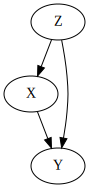

In [5]:
# Define the graph with 3 nodes
g = SimpleDiGraph(3)
add_edge!(g, 1, 2)  # X -> Y
add_edge!(g, 3, 1)  # Z -> X
add_edge!(g, 3, 2)  # Z -> Y

# Node labels for X, Y, Z
nodelabel = ["X", "Y", "Z"]

# Define node colors based on labels
nodefillc_dict = Dict("X" => colorant"turquoise",
                      "Y" => colorant"turquoise",
                      "Z" => colorant"turquoise")

nodefillc = [nodefillc_dict[label] for label in nodelabel]

# Create the graph plot
g_plot = gplot(g,
               nodefillc = nodefillc,
               nodestrokec = "black",
               nodestrokelw = 0,
               nodelabel = nodelabel,
               NODESIZE = 0.15,
               NODELABELSIZE = 10,
               edgestrokec = "black")

# Save and display the plot
draw(PNG("causal_discovery_1.png", 13cm, 13cm), g_plot)
g_plot

In [2]:
# Set seed
Random.seed!(24)

# Generate data
n = 1000
Z = rand(Normal(0, 1), n)
X = 5 * Z + rand(Normal(0, 1), n)
Y = 3 * X + 1.5 * Z + rand(Normal(0, 1), n)

# Create dataframe
df = DataFrame(Z = Z, X = X, Y = Y)

1000×3 typename(DataFrame)
│ Row  │ Z          │ X         │ Y        │
│      │ Float64    │ Float64   │ Float64  │
├──────┼────────────┼───────────┼──────────┤
│ 1    │ 0.121698   │ -0.646629 │ -2.17627 │
│ 2    │ -0.0329104 │ 2.15083   │ 5.12964  │
│ 3    │ -1.86593   │ -8.56013  │ -28.4291 │
│ 4    │ -0.402004  │ -3.37725  │ -10.4183 │
│ 5    │ 0.298821   │ 2.03012   │ 5.97373  │
│ 6    │ 1.88838    │ 8.48632   │ 29.592   │
│ 7    │ -0.998066  │ -4.56851  │ -14.6436 │
│ 8    │ -1.11586   │ -4.5261   │ -15.5884 │
│ 9    │ -0.558549  │ -2.6828   │ -10.8751 │
│ 10   │ 0.376278   │ 2.72978   │ 8.67289  │
⋮
│ 990  │ 0.511736   │ 2.19837   │ 8.51534  │
│ 991  │ -0.414298  │ -2.65654  │ -9.153   │
│ 992  │ 0.409026   │ 0.929877  │ 3.43171  │
│ 993  │ -3.28082   │ -17.1779  │ -55.4052 │
│ 994  │ 1.40124    │ 7.17753   │ 24.558   │
│ 995  │ 0.834262   │ 5.43227   │ 16.441   │
│ 996  │ -0.695846  │ -4.21887  │ -14.8065 │
│ 997  │ -0.532479  │ -2.4846   │ -8.55517 │
│ 998  │ 1.81796    │ 9.48347   │ 29.8232  │
│ 999  │ 1.12942    │ 5.75758   │ 18.6553  │
│ 1000 │ -0.614838  │ -2.64345  │ -9.5324  │

In [3]:
# Wrong regression, not controlling by the confounder Z
lm(@formula(Y ~ X), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
──────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error       t  Pr(>|t|)   Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  0.021246  0.032701      0.65    0.5160  -0.0429246  0.0854166
X            3.29515   0.00623332  528.63    <1e-99   3.28291    3.30738
──────────────────────────────────────────────────────────────────────────

In [4]:
# Correct regression
lm(@formula(Y ~ X + Z), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X + Z

Coefficients:
──────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)   Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  0.0102651   0.0315753   0.33    0.7452  -0.0516965  0.0722268
X            3.03339     0.0307871  98.53    <1e-99   2.97297    3.0938
Z            1.35458     0.156251    8.67    <1e-16   1.04796    1.6612
──────────────────────────────────────────────────────────────────────────

**Model 2** 

We will assume that _X_ stands for the police salaries that affect the crime rate (_Y_). Then, we have another observable variable, as the policemen's supply (_Z_), that impacts _X_ but not _Y_. And, additionally, we know that there is an unobservable variable (_U_), as the preference for maintaining civil order, that affects _Z_ and _Y_. The theory says that when controlling by _Z_, we block (some) of the unobservable variable’s back-door path from _X_ to _Y_. Thus, we see that in the second regression, the coefficient of _X_ is equal to the real one (0.5).

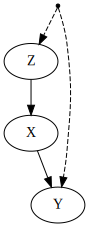

In [8]:
# Define the graph with 4 nodes: U, Z, X, Y
g = SimpleDiGraph(4)
add_edge!(g, 1, 4)  # U -> Y
add_edge!(g, 1, 2)  # U -> Z
add_edge!(g, 2, 3)  # Z -> X
add_edge!(g, 3, 4)  # X -> Y

# Node labels for U, Z, X, Y
nodelabel = ["U", "Z", "X", "Y"]

# Define node colors based on labels
nodefillc_dict = Dict("U" => colorant"lightgrey",
                      "Z" => colorant"turquoise",
                      "X" => colorant"turquoise",
                      "Y" => colorant"turquoise")

nodefillc = [nodefillc_dict[label] for label in nodelabel]

# Create the graph plot
g_plot = gplot(g,
               nodefillc = nodefillc,
               nodestrokec = "black",
               nodestrokelw = 0,
               nodelabel = nodelabel,
               NODESIZE = 0.15,
               NODELABELSIZE = 10,
               edgestrokec = "black")

# Save and display the plot
draw(PNG("causal_graph.png", 13cm, 13cm), g_plot)
g_plot

In [26]:
# Set seed
Random.seed!(24)

# Generate data
n = 1000
U = rand(Normal(0, 1), n)
Z = 7 * U + rand(Normal(0, 1), n)
X = 2 * Z + rand(Normal(0, 1), n)
Y = 0.5 * X + 0.2 * U + rand(Normal(0, 1), n)

# Create dataframe
df = DataFrame(Z = Z, X = X, Y = Y, U = U)

1000×4 typename(DataFrame)
│ Row  │ Z         │ X        │ Y        │ U          │
│      │ Float64   │ Float64  │ Float64  │ Float64    │
├──────┼───────────┼──────────┼──────────┼────────────┤
│ 1    │ -0.403233 │ -1.2254  │ -2.2511  │ 0.121698   │
│ 2    │ 2.08501   │ 2.89654  │ 1.13287  │ -0.0329104 │
│ 3    │ -12.292   │ -24.5338 │ -12.1042 │ -1.86593   │
│ 4    │ -4.18126  │ -8.04607 │ -4.90671 │ -0.402004  │
│ 5    │ 2.62777   │ 4.69066  │ 2.44994  │ 0.298821   │
│ 6    │ 12.2631   │ 25.8266  │ 13.0174  │ 1.88838    │
│ 7    │ -6.56464  │ -12.5702 │ -6.84891 │ -0.998066  │
│ 8    │ -6.75783  │ -13.8519 │ -7.02647 │ -1.11586   │
│ 9    │ -3.7999   │ -9.58863 │ -4.76023 │ -0.558549  │
│ 10   │ 3.48233   │ 6.8838   │ 4.36792  │ 0.376278   │
⋮
│ 990  │ 3.22185   │ 7.59631  │ 3.28416  │ 0.511736   │
│ 991  │ -3.48514  │ -7.5322  │ -5.22515 │ -0.414298  │
│ 992  │ 1.74793   │ 3.5244   │ 2.8417   │ 0.409026   │
│ 993  │ -23.7396  │ -46.4293 │ -24.8613 │ -3.28082   │
│ 994  │ 9.98001   │ 20.8836  │ 11.6736  │ 1.40124    │
│ 995  │ 7.10079   │ 13.0944  │ 8.14068  │ 0.834262   │
│ 996  │ -5.61056  │ -12.3273 │ -4.71156 │ -0.695846  │
│ 997  │ -3.54955  │ -7.40177 │ -3.90656 │ -0.532479  │
│ 998  │ 13.1194   │ 24.8846  │ 11.9085  │ 1.81796    │
│ 999  │ 8.01642   │ 15.7212  │ 7.67928  │ 1.12942    │
│ 1000 │ -3.87312  │ -8.42605 │ -2.9775  │ -0.614838  │

In [27]:
# Wrong regression, not controlling by the confounder Z
lm(@formula(Y ~ X), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error       t  Pr(>|t|)   Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0337287  0.0307735    -1.10    0.2733  -0.0941169  0.0266596
X             0.514806   0.00210354  244.73    <1e-99   0.510678   0.518934
────────────────────────────────────────────────────────────────────────────

In [28]:
# Controlling by the confounder Z
lm(@formula(Y ~ X + Z), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X + Z

Coefficients:
──────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0327959   0.0306374  -1.07    0.2847  -0.092917  0.0273253
X             0.417904    0.0307391  13.60    <1e-38   0.357583  0.478225
Z             0.195056    0.0617315   3.16    0.0016   0.073917  0.316194
──────────────────────────────────────────────────────────────────────────

#### Bad Control (M-bias)

**Model 7** 

Let us suppose that _X_ stands for a job training program aimed at reducing unemployment. Then, there is a first unobserved confounder, which could be the planning effort and good design of the job program (_U1_) that impacts directly on the participation in job training programs (_X_) and the proximity of job programs (that would be the bad control _Z_). Furthermore, we have another unobserved confounder (_U2_), as the soft skills of the unemployed, that affects the employment status of individuals (_Y_) and the likelihood of beeing in a job training program that is closer (_Z_). That is why including _Z_ in the second regression makes _X_ coefficient value further to the real one.

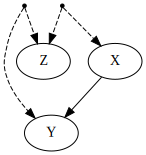

In [11]:
# Define the graph with 5 nodes: U1, U2, Z, X, Y
g = SimpleDiGraph(5)
add_edge!(g, 1, 3)  # U1 -> Z
add_edge!(g, 1, 4)  # U1 -> X
add_edge!(g, 2, 3)  # U2 -> Z
add_edge!(g, 2, 5)  # U2 -> Y
add_edge!(g, 4, 5)  # X -> Y

# Node labels for U1, U2, Z, X, Y
nodelabel = ["U1", "U2", "Z", "X", "Y"]

# Define node colors based on labels
nodefillc_dict = Dict("U1" => colorant"lightgrey",
                      "U2" => colorant"lightgrey",
                      "Z" => colorant"turquoise",
                      "X" => colorant"turquoise",
                      "Y" => colorant"turquoise")

nodefillc = [nodefillc_dict[label] for label in nodelabel]

# Create the graph plot
g_plot = gplot(g,
               nodefillc = nodefillc,
               nodestrokec = "black",
               nodestrokelw = 0,
               nodelabel = nodelabel,
               NODESIZE = 0.15,
               NODELABELSIZE = 10,
               edgestrokec = "black")

# Save and display the plot
draw(PNG("causal_graph.png", 13cm, 13cm), g_plot)
g_plot

In [23]:
# Set seed
Random.seed!(24)

# Generate data
n = 1000
U1 = rand(Normal(0, 1), n)
U2 = rand(Normal(0, 1), n)
Z = 0.3 * U1 + 0.9 * U2 + rand(Normal(0, 1), n)
X = 4 * U1 + rand(Normal(0, 1), n)
Y = 3 * X + U2 + rand(Normal(0, 1), n)

# Create dataframe
df = DataFrame(Z = Z, X = X, Y = Y, U1 = U1, U2 = U2)

1000×5 typename(DataFrame)
│ Row  │ Z          │ X         │ Y        │ U1         │ U2        │
│      │ Float64    │ Float64   │ Float64  │ Float64    │ Float64   │
├──────┼────────────┼───────────┼──────────┼────────────┼───────────┤
│ 1    │ -1.51203   │ -1.17595  │ -5.82291 │ 0.121698   │ -1.25512  │
│ 2    │ 0.800487   │ -0.440459 │ 1.23247  │ -0.0329104 │ 2.31538   │
│ 3    │ 0.182939   │ -6.92784  │ -20.038  │ -1.86593   │ 0.769514  │
│ 4    │ -1.03465   │ -2.41129  │ -8.13353 │ -0.402004  │ -1.36723  │
│ 5    │ 0.00718558 │ 1.24013   │ 4.10467  │ 0.298821   │ 0.53602   │
│ 6    │ 1.00698    │ 7.27991   │ 19.8046  │ 1.88838    │ -0.955557 │
│ 7    │ 0.639282   │ -4.35645  │ -12.425  │ -0.998066  │ 0.421824  │
│ 8    │ 0.276855   │ -4.34078  │ -11.7458 │ -1.11586   │ 1.0532    │
│ 9    │ -2.05745   │ -2.0884   │ -6.33028 │ -0.558549  │ 0.109943  │
│ 10   │ 0.79557    │ 2.35588   │ 7.04324  │ 0.376278   │ 0.848389  │
⋮
│ 990  │ 0.981862   │ 1.4306    │ 5.19396  │ 0.511736   │ -0.360307 │
│ 991  │ -1.21276   │ -3.03338  │ -9.7172  │ -0.414298  │ -0.585057 │
│ 992  │ -0.852482  │ 2.6338    │ 6.30786  │ 0.409026   │ -1.11525  │
│ 993  │ -0.630932  │ -14.1137  │ -44.1032 │ -3.28082   │ -0.773843 │
│ 994  │ 1.49815    │ 6.55655   │ 20.4824  │ 1.40124    │ 0.171316  │
│ 995  │ 0.277968   │ 4.76367   │ 16.2005  │ 0.834262   │ 1.26096   │
│ 996  │ -1.98061   │ -1.19212  │ -3.08255 │ -0.695846  │ -0.739635 │
│ 997  │ -0.302389  │ -2.22909  │ -6.73372 │ -0.532479  │ 0.177797  │
│ 998  │ -0.454527  │ 6.37445   │ 19.7451  │ 1.81796    │ 0.393651  │
│ 999  │ 0.126651   │ 4.11045   │ 10.2327  │ 1.12942    │ 0.110499  │
│ 1000 │ -0.476586  │ -1.10086  │ -3.23919 │ -0.614838  │ 0.430747  │

In [24]:
# Wrong regression, not controlling by the confounder Z
lm(@formula(Y ~ X), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
───────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0121698   0.0470352   -0.26    0.7959  -0.104469  0.0801295
X             2.98862     0.0110309  270.93    <1e-99   2.96698   3.01027
───────────────────────────────────────────────────────────────────────────

In [25]:
# Controlling by the confounder Z
lm(@formula(Y ~ X + Z), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X + Z

Coefficients:
───────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error       t  Pr(>|t|)   Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  0.0022004  0.0409946     0.05    0.9572  -0.0782452   0.082646
X            2.95344    0.00981324  300.96    <1e-99   2.93418     2.9727
Z            0.526533   0.0295594    17.81    <1e-61   0.468528    0.584539
───────────────────────────────────────────────────────────────────────────

#### Neutral Control (possibly good for precision)

**Model 8** 

In this scenario, we will assume that _X_ represents the implementation of a new government policy to provide subsidies and guidance for small companies. There is another variable, _Z_, that stands for the % inflation rate. And both _X_ and _Z_ affect _Y_, which represents the GDP growth rate of the country. Then, even if _Z_ does not impact _X_, its inclusion improves the precision of the ATE estimator (8.63339 is closer to 8.6).

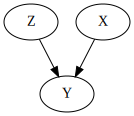

In [14]:
# Define the graph with 3 nodes: Z, X, Y
g = SimpleDiGraph(3)
add_edge!(g, 1, 3)  # Z -> Y
add_edge!(g, 2, 3)  # X -> Y

# Node labels for Z, X, Y
nodelabel = ["Z", "X", "Y"]

# Define node colors based on labels
nodefillc_dict = Dict("Z" => colorant"turquoise",
                      "X" => colorant"turquoise",
                      "Y" => colorant"turquoise")

nodefillc = [nodefillc_dict[label] for label in nodelabel]

# Create the graph plot
g_plot = gplot(g,
               nodefillc = nodefillc,
               nodestrokec = "black",
               nodestrokelw = 0,
               nodelabel = nodelabel,
               NODESIZE = 0.15,
               NODELABELSIZE = 10,
               edgestrokec = "black")

# Save and display the plot
draw(PNG("causal_graph.png", 13cm, 13cm), g_plot)
g_plot

In [31]:
# Set seed
Random.seed!(24)

# Generate data
n = 1000
Z = rand(Normal(0, 1), n)
X = rand(Normal(0, 1), n)
Y = 8.6 * X + 5 * Z + rand(Normal(0, 1), n)

# Create dataframe
df = DataFrame(Z = Z, X = X, Y = Y)

1000×3 typename(DataFrame)
│ Row  │ Z          │ X         │ Y          │
│      │ Float64    │ Float64   │ Float64    │
├──────┼────────────┼───────────┼────────────┤
│ 1    │ 0.121698   │ -1.25512  │ -10.6044   │
│ 2    │ -0.0329104 │ 2.31538   │ 18.4743    │
│ 3    │ -1.86593   │ 0.769514  │ -2.66167   │
│ 4    │ -0.402004  │ -1.36723  │ -13.4518   │
│ 5    │ 0.298821   │ 0.53602   │ 5.539      │
│ 6    │ 1.88838    │ -0.955557 │ 2.52455    │
│ 7    │ -0.998066  │ 0.421824  │ -0.803581  │
│ 8    │ -1.11586   │ 1.0532    │ 3.14196    │
│ 9    │ -0.558549  │ 0.109943  │ -3.83607   │
│ 10   │ 0.376278   │ 0.848389  │ 9.09667    │
⋮
│ 990  │ 0.511736   │ -0.360307 │ 0.612656   │
│ 991  │ -0.414298  │ -0.585057 │ -7.66489   │
│ 992  │ 0.409026   │ -1.11525  │ -7.51751   │
│ 993  │ -3.28082   │ -0.773843 │ -22.0094   │
│ 994  │ 1.40124    │ 0.171316  │ 9.40313    │
│ 995  │ 0.834262   │ 1.26096   │ 13.9084    │
│ 996  │ -0.695846  │ -0.739635 │ -10.9463   │
│ 997  │ -0.532479  │ 0.177797  │ -1.436     │
│ 998  │ 1.81796    │ 0.393651  │ 11.121     │
│ 999  │ 1.12942    │ 0.110499  │ 6.28575    │
│ 1000 │ -0.614838  │ 0.430747  │ -0.0495766 │

In [32]:
# Wrong regression, not controlling by the confounder Z
lm(@formula(Y ~ X), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
──────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0115351    0.167397  -0.07    0.9451  -0.340025   0.316955
X             8.5183       0.163177  52.20    <1e-99   8.19809    8.83851
──────────────────────────────────────────────────────────────────────────

In [33]:
# Controlling by the confounder Z
lm(@formula(Y ~ X + Z), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X + Z

Coefficients:
───────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error       t  Pr(>|t|)   Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  0.0102651   0.0315753    0.33    0.7452  -0.0516965  0.0722268
X            8.63339     0.0307871  280.42    <1e-99   8.57297    8.6938
Z            5.02152     0.0305298  164.48    <1e-99   4.96161    5.08143
───────────────────────────────────────────────────────────────────────────

#### Bad Controls (Bias amplification)

**Model 10** 

Let us assume that _X_ measures the implementation of a housing program for young adults buying their first house, which impacts the average housing prices (_Y_). There is another observable variable, _Z_, that measures the expenditure of the program and affects only _X_. Also, there is an unobservable variable (_U_) that represents the preference of young adults to move from their parent's house and impacts only _X_ and _Y_. Therefore, the inclusion of _Z_ will "amplify the bias" of (•) on _X_, so the ATE estimator will be worse. We can see that in the second regression, the estimator (0.833083) is much farther from the real value (0.8).

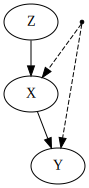

In [17]:
# Define the graph with 4 nodes: U, Z, X, Y
g = SimpleDiGraph(4)
add_edge!(g, 1, 3)  # U -> X
add_edge!(g, 1, 4)  # U -> Y
add_edge!(g, 2, 3)  # Z -> X
add_edge!(g, 3, 4)  # X -> Y

# Node labels for U, Z, X, Y
nodelabel = ["U", "Z", "X", "Y"]

# Define node colors based on labels
nodefillc_dict = Dict("U" => colorant"lightgrey",
                      "Z" => colorant"turquoise",
                      "X" => colorant"turquoise",
                      "Y" => colorant"turquoise")

nodefillc = [nodefillc_dict[label] for label in nodelabel]

# Create the graph plot
g_plot = gplot(g,
               nodefillc = nodefillc,
               nodestrokec = "black",
               nodestrokelw = 0,
               nodelabel = nodelabel,
               NODESIZE = 0.15,
               NODELABELSIZE = 10,
               edgestrokec = "black")

# Save and display the plot
draw(PNG("causal_graph.png", 13cm, 13cm), g_plot)
g_plot

In [34]:
# Set seed
Random.seed!(24)

# Generate data
n = 1000
U = rand(Normal(0, 1), n)
Z = rand(Normal(0, 1), n)
X = 3 * Z + 6 * U + rand(Normal(0, 1), n)
Y = 0.8 * X + 0.2 * U + rand(Normal(0, 1), n)

# Create dataframe
df = DataFrame(U = U, Z = Z, X = X, Y = Y)

1000×4 typename(DataFrame)
│ Row  │ U          │ Z         │ X         │ Y        │
│      │ Float64    │ Float64   │ Float64   │ Float64  │
├──────┼────────────┼───────────┼───────────┼──────────┤
│ 1    │ 0.121698   │ -1.25512  │ -3.4541   │ -4.40168 │
│ 2    │ -0.0329104 │ 2.31538   │ 5.4752    │ 4.06476  │
│ 3    │ -1.86593   │ 0.769514  │ -8.83687  │ -6.90681 │
│ 4    │ -0.402004  │ -1.36723  │ -6.19727  │ -5.84149 │
│ 5    │ 0.298821   │ 0.53602   │ 2.83611   │ 2.3735   │
│ 6    │ 1.88838    │ -0.955557 │ 9.76405   │ 7.91532  │
│ 7    │ -0.998066  │ 0.421824  │ -4.16386  │ -3.89489 │
│ 8    │ -1.11586   │ 1.0532    │ -3.87183  │ -3.19797 │
│ 9    │ -0.558549  │ 0.109943  │ -5.0103   │ -3.97415 │
│ 10   │ 0.376278   │ 0.848389  │ 4.72197   │ 4.7036   │
⋮
│ 990  │ 0.511736   │ -0.360307 │ 3.14211   │ 1.99969  │
│ 991  │ -0.414298  │ -0.585057 │ -4.80287  │ -5.30135 │
│ 992  │ 0.409026   │ -1.11525  │ -0.863066 │ 0.389051 │
│ 993  │ -3.28082   │ -0.773843 │ -20.9567  │ -18.4119 │
│ 994  │ 1.40124    │ 0.171316  │ 9.845     │ 9.10783  │
│ 995  │ 0.834262   │ 1.26096   │ 7.68127   │ 7.7385   │
│ 996  │ -0.695846  │ -0.739635 │ -7.50016  │ -4.54804 │
│ 997  │ -0.532479  │ 0.177797  │ -2.96414  │ -2.57699 │
│ 998  │ 1.81796    │ 0.393651  │ 10.7345   │ 8.05381  │
│ 999  │ 1.12942    │ 0.110499  │ 6.79637   │ 5.25577  │
│ 1000 │ -0.614838  │ 0.430747  │ -3.0766   │ -1.22576 │

In [35]:
# Wrong regression, not controlling by the confounder Z
lm(@formula(Y ~ X), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error       t  Pr(>|t|)   Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0317809  0.0309595    -1.03    0.3049  -0.0925341  0.0289723
X             0.827152   0.00444388  186.13    <1e-99   0.818432   0.835872
────────────────────────────────────────────────────────────────────────────

In [36]:
lm(@formula(Y ~ X + Z), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X + Z

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error       t  Pr(>|t|)   Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0349805  0.0308707    -1.13    0.2574  -0.0955594   0.0255984
X             0.833083   0.00489468  170.20    <1e-99   0.823478    0.842688
Z            -0.0946024  0.0332626    -2.84    0.0045  -0.159875   -0.0293297
─────────────────────────────────────────────────────────────────────────────